# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
%matplotlib notebook

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key


'05d4c99c2d26e67cd9bbfc90440e32d9'

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

#or city in cities:
#       print(city)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#DATAFRAME FOR LIST OF CITIES
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:'CITY'})
cities_df.head()

,CITY
0,cidreira
1,oyek
2,codrington
3,bluff
4,kapaa


In [7]:
#Add lat and lngs to dataframe, create separate columns for lats and longs
cities_df['lat_lngs'] = lat_lng_list
cities_df['latitude'] = cities_df.lat_lngs.map(lambda x: str(x[0]))
cities_df['longitude'] = cities_df.lat_lngs.map(lambda x: str(x[1]))

#Data to be collected from API
cities_df['temp'] = ""
cities_df['max_temp'] = ""
cities_df['humidity'] = ""
cities_df['wind_speed'] = ""
cities_df['cloudiness'] = ""
cities_df['country'] = ""
cities_df['date'] = ""

cities_df.head()

,CITY,lat_lngs,latitude,longitude,temp,max_temp,humidity,wind_speed,cloudiness,country,date
0,cidreira,"(-38.60820227543575, -40.597026852468815)",-38.60820227543575,-40.597026852468815,,,,,,,
1,oyek,"(53.049070243124504, 104.32120199454687)",53.049070243124504,104.32120199454687,,,,,,,
2,codrington,"(24.558050420704944, -45.35258835287536)",24.558050420704944,-45.35258835287536,,,,,,,
3,bluff,"(-79.22629010813466, 167.39111688763097)",-79.22629010813466,167.39111688763097,,,,,,,
4,kapaa,"(32.256873150643855, -169.0635027675688)",32.256873150643855,-169.0635027675688,,,,,,,


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "sydney"
#go through each Row
for index,row in cities_df.iterrows():
    city= row['CITY']
    print(f"Showing Record # {index + 1} | {city}")
# Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city.replace(" ", "+")+"&units=imperial"
    #print(query_url)
    weather_json = requests.get(query_url).json()
    try:
        cities_df.loc[index, 'temp'] = weather_json['main']['temp']
        cities_df.loc[index, 'max_temp'] = weather_json['main']['temp_max']
        cities_df.loc[index, 'humidity'] = weather_json['main']['humidity']
        cities_df.loc[index, 'wind_speed'] = weather_json['wind']['speed']
        cities_df.loc[index, 'cloudiness'] = weather_json['clouds']['all']
        cities_df.loc[index, 'country'] = weather_json['sys']['country']
        cities_df.loc[index, 'date'] = weather_json['dt']
        
    except:
        cities_df.loc[index, 'temp'] = 'city not found'
        cities_df.loc[index, 'humidity'] = 'city not found'
        cities_df.loc[index, 'wind_speed'] = 'city not found'
        cities_df.loc[index, 'cloudiness'] = 'city not found'
        cities_df.loc[index, 'country'] = 'city not found'
        cities_df.loc[index, 'date'] = 'city not found'
   # time.sleep(.50)

Showing Record # 1 | cidreira
Showing Record # 2 | oyek
Showing Record # 3 | codrington
Showing Record # 4 | bluff
Showing Record # 5 | kapaa
Showing Record # 7 | ushuaia
Showing Record # 8 | atuona
Showing Record # 9 | bethel
Showing Record # 10 | hermanus
Showing Record # 11 | upernavik
Showing Record # 12 | mataura
Showing Record # 13 | punta arenas
Showing Record # 14 | olivenza
Showing Record # 15 | tuktoyaktuk
Showing Record # 16 | khatanga
Showing Record # 17 | vaini
Showing Record # 19 | verkhoyansk
Showing Record # 20 | hobart
Showing Record # 21 | hilo
Showing Record # 22 | havelock
Showing Record # 23 | grojdibodu
Showing Record # 24 | georgetown
Showing Record # 25 | kruisfontein
Showing Record # 26 | kingaroy
Showing Record # 27 | rikitea
Showing Record # 28 | bredasdorp
Showing Record # 30 | avarua
Showing Record # 31 | vrangel
Showing Record # 32 | lasa
Showing Record # 33 | khandbari
Showing Record # 34 | tuatapere
Showing Record # 35 | nikolskoye
Showing Record # 36 | 

Showing Record # 275 | kahului
Showing Record # 276 | kiruna
Showing Record # 277 | broken hill
Showing Record # 278 | pevek
Showing Record # 279 | beloha
Showing Record # 280 | grao mogol
Showing Record # 281 | gimli
Showing Record # 282 | puerto madryn
Showing Record # 284 | cacoal
Showing Record # 285 | lompoc
Showing Record # 286 | mushie
Showing Record # 288 | lincoln
Showing Record # 289 | champerico
Showing Record # 290 | belyy yar
Showing Record # 293 | gamba
Showing Record # 294 | vila nova de milfontes
Showing Record # 295 | auki
Showing Record # 296 | broome
Showing Record # 297 | luorong
Showing Record # 299 | nisia floresta
Showing Record # 300 | jakar
Showing Record # 301 | samarai
Showing Record # 302 | margate
Showing Record # 303 | dikson
Showing Record # 304 | foki
Showing Record # 306 | pangody
Showing Record # 308 | saint-augustin
Showing Record # 309 | ambon
Showing Record # 310 | ilhabela
Showing Record # 311 | porto nacional
Showing Record # 312 | bonavista
Showi

Showing Record # 556 | vikulovo
Showing Record # 557 | emmett
Showing Record # 558 | jalu
Showing Record # 559 | peruibe
Showing Record # 560 | cradock
Showing Record # 561 | jiancheng
Showing Record # 562 | kamina
Showing Record # 563 | bathsheba
Showing Record # 564 | varnavino
Showing Record # 565 | iskateley
Showing Record # 566 | providencia
Showing Record # 567 | opuwo
Showing Record # 568 | ereymentau
Showing Record # 569 | mbamba
Showing Record # 570 | madaoua
Showing Record # 571 | kez
Showing Record # 572 | outlook
Showing Record # 574 | tsaratanana
Showing Record # 575 | griffith
Showing Record # 577 | kathmandu
Showing Record # 578 | nha trang
Showing Record # 579 | westport
Showing Record # 580 | carberry
Showing Record # 581 | samana
Showing Record # 582 | sapouy
Showing Record # 583 | longhua
Showing Record # 584 | yelizovo
Showing Record # 586 | grand forks
Showing Record # 587 | xiaoweizhai
Showing Record # 589 | vilhena
Showing Record # 590 | bulungu
Showing Record # 

In [94]:
# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()
#print(weather_json)

{'coord': {'lon': 86.21, 'lat': 23.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 298.51, 'feels_like': 292.67, 'temp_min': 298.51, 'temp_max': 298.51, 'pressure': 1015, 'humidity': 15, 'sea_level': 1015, 'grnd_level': 977}, 'wind': {'speed': 4.91, 'deg': 317}, 'clouds': {'all': 0}, 'dt': 1581492608, 'sys': {'country': 'IN', 'sunrise': 1581468653, 'sunset': 1581509285}, 'timezone': 19800, 'id': 1274553, 'name': 'Baghmara', 'cod': 200}


In [14]:
 cities_df.head()

,CITY,lat_lngs,latitude,longitude,temp,max_temp,humidity,wind_speed,cloudiness,country,date
0,cidreira,"(-38.60820227543575, -40.597026852468815)",-38.608202,-40.597026852468815,74.12,74.12,75,24.14,0,BR,1581542629
1,oyek,"(53.049070243124504, 104.32120199454687)",53.049070,104.32120199454687,3.2,3.2,84,2.24,75,RU,1581542939
2,codrington,"(24.558050420704944, -45.35258835287536)",24.558050,-45.35258835287536,64.98,64.98,92,20.4,69,AU,1581542919
3,bluff,"(-79.22629010813466, 167.39111688763097)",-79.226290,167.39111688763097,57.99,57.99,92,5.01,89,NZ,1581542874
4,kapaa,"(32.256873150643855, -169.0635027675688)",32.256873,-169.0635027675688,74.8,75.2,73,12.75,75,US,1581542654


In [18]:
cities_df.to_csv('citydata.csv',header=True , index=True)
print('file written')

file written


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


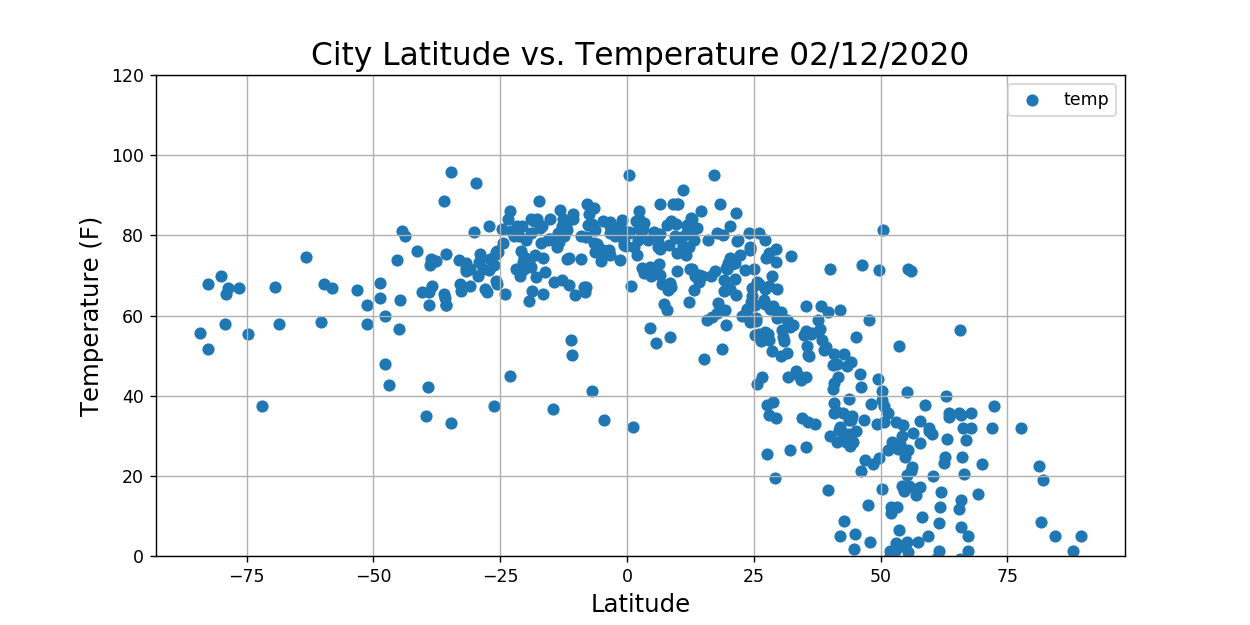

In [17]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

cities_df = cities_df[cities_df.temp != 'city not found']
cities_df.latitude = cities_df.latitude.astype(float)

#sns.set()
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(cities_df['latitude'], cities_df['temp'])
ax.set_title(f"City Latitude vs. Temperature {date}", fontsize="18")
ax.set_xlabel("Latitude", fontsize="14")
ax.set_ylabel("Temperature (F)", fontsize="14")
ax.grid()
ax.legend()
ax.set_ylim(0, 120)


# Save the Figure
fig.savefig("Latitude_vs_Temperature_Plot.png")

fig.show()

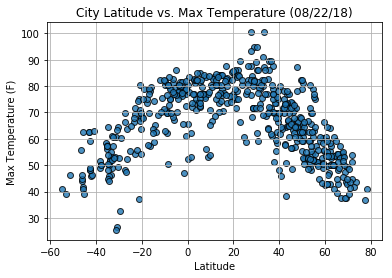

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


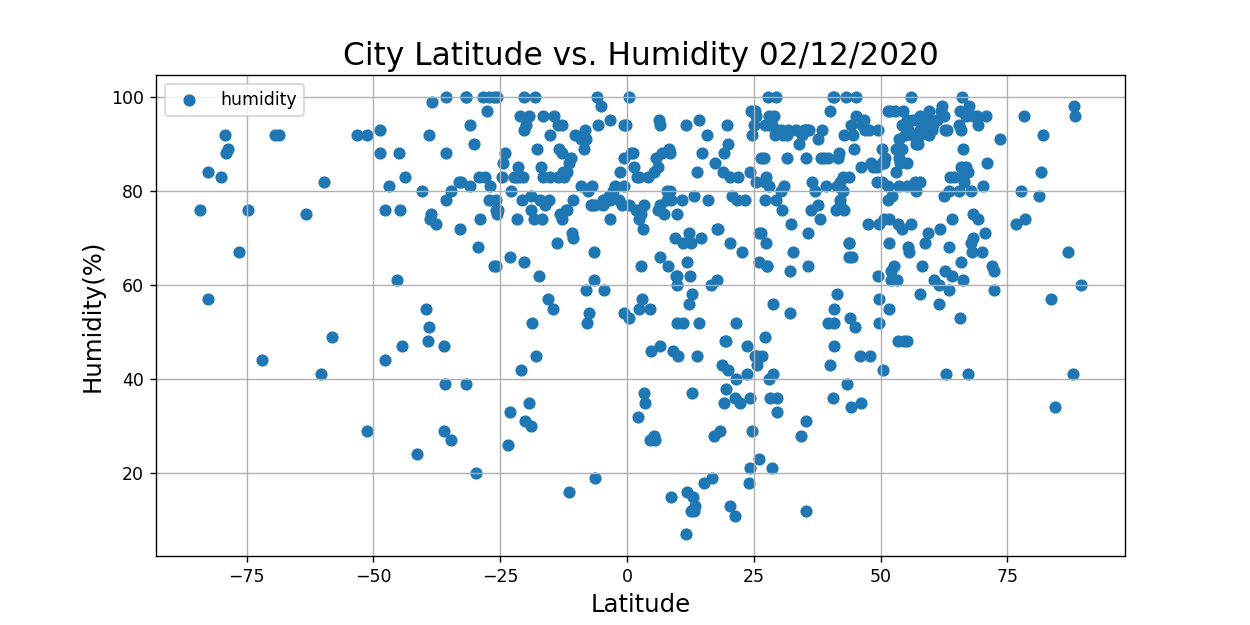

In [19]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

cities_df = cities_df[cities_df.temp != 'city not found']
cities_df.latitude = cities_df.latitude.astype(float)

#sns.set()
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(cities_df['latitude'], cities_df['humidity'])
ax.set_title(f"City Latitude vs. Humidity {date}", fontsize="18")
ax.set_xlabel("Latitude", fontsize="14")
ax.set_ylabel("Humidity(%)", fontsize="14")
ax.grid()
ax.legend()
#ax.set_ylim(0, 120)


# Save the Figure
fig.savefig("Latitude_vs_Humidity_Plot.png")

fig.show()

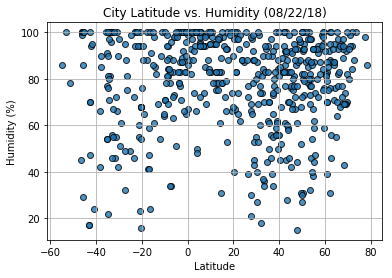

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


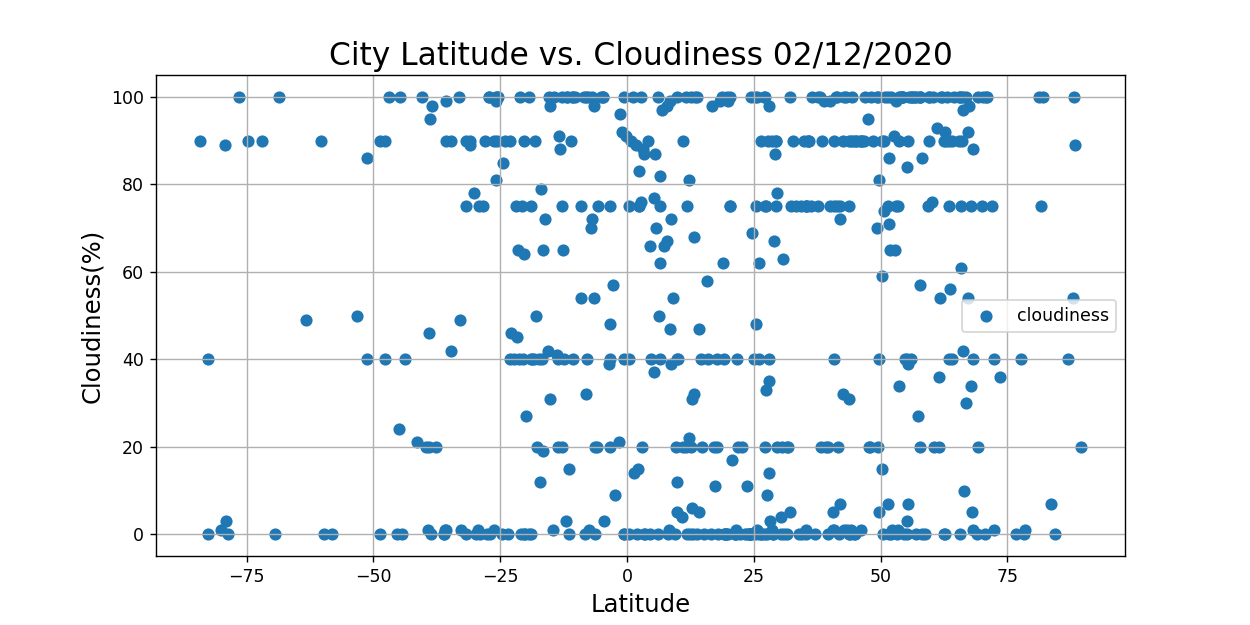

In [20]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

cities_df = cities_df[cities_df.temp != 'city not found']
cities_df.latitude = cities_df.latitude.astype(float)

#sns.set()
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(cities_df['latitude'], cities_df['cloudiness'])
ax.set_title(f"City Latitude vs. Cloudiness {date}", fontsize="18")
ax.set_xlabel("Latitude", fontsize="14")
ax.set_ylabel("Cloudiness(%)", fontsize="14")
ax.grid()
ax.legend()
#ax.set_ylim(0, 120)


# Save the Figure
fig.savefig("Latitude_vs_Cloudiness_Plot.png")

fig.show()

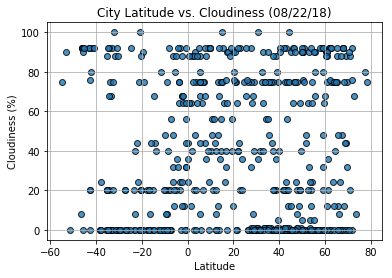

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


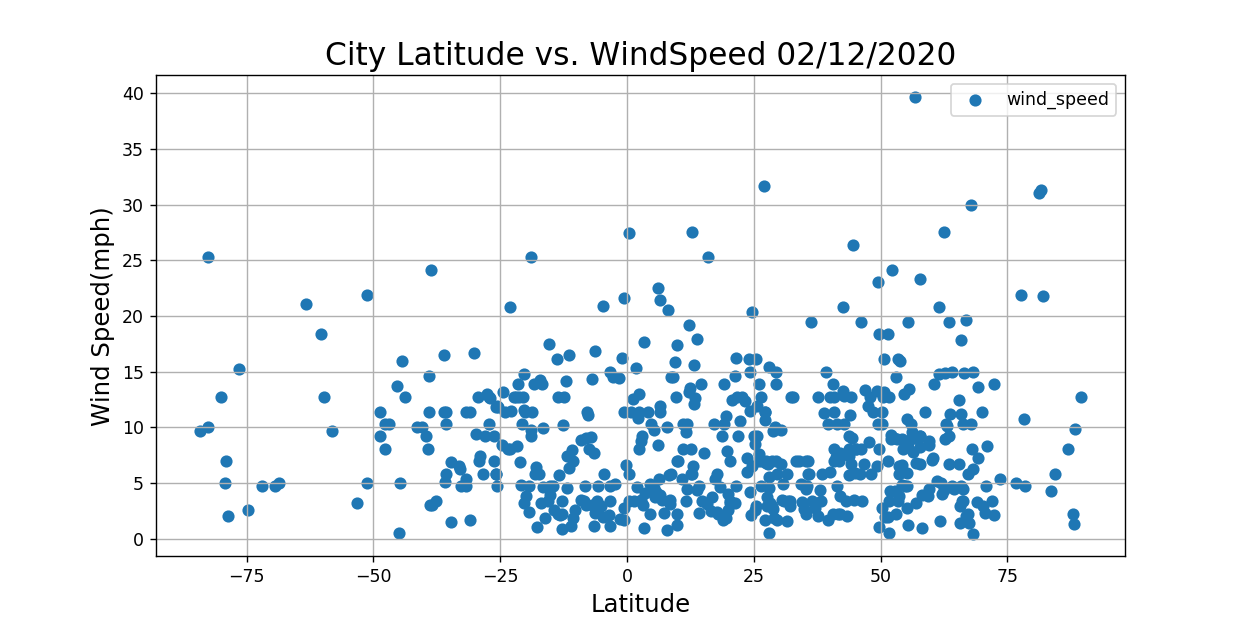

In [21]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

#Remove any cities that could not be found from the dataframe
cities_df = cities_df[cities_df.temp != 'city not found']
#Convert latitude from string to float object
cities_df.latitude = cities_df.latitude.astype(float)

#sns.set()
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(cities_df['latitude'], cities_df['wind_speed'])
ax.set_title(f"City Latitude vs. WindSpeed {date}", fontsize="18")
ax.set_xlabel("Latitude", fontsize="14")
ax.set_ylabel("Wind Speed(mph)", fontsize="14")
ax.grid()
ax.legend()
#ax.set_ylim(0, 120)


# Save the Figure
fig.savefig("Latitude_vs_Wind_Speed_Plot.png")

fig.show()

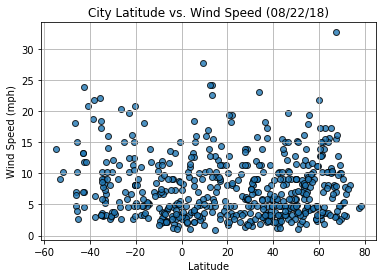

In [ ]:
#observation from the scatter plots
#1. The temperature tends to increase close to equater i.e 0 latitude.
#2.The latitude and cloudiness shows no co-relation
#3.The plotting shows no co-relation between latitude and the wind-speed.